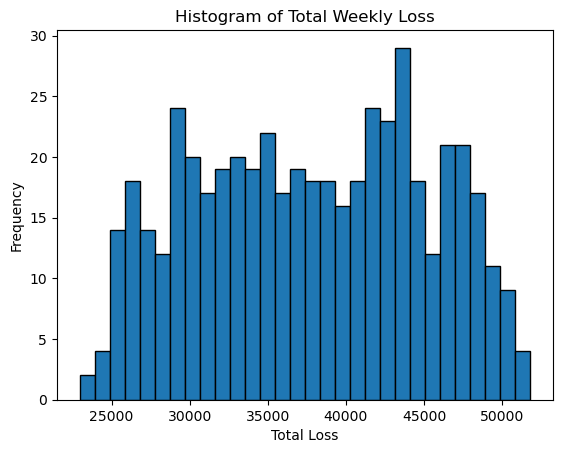

Mean weekly loss: $37750.98
90% confidence interval for the mean weekly loss: ($37215.38, $38286.58)
Probability that the loss is greater than $40,000: 0.4300
Probability that the loss is less than $35,000: 0.3920


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Simulation setup
num_replications = 500

# N is uniformly distributed between 100 and 200
N_values = np.random.randint(100, 201, num_replications)

# Z_i is triangularly distributed between $100 and $500 with mode $150
def triangular_distribution(size):
    return np.random.triangular(100, 150, 500, size)

# Step 2: Simulate the model
X_values = []
for N in N_values:
    Z_values = triangular_distribution(N)
    X = np.sum(Z_values)
    X_values.append(X)

X_values = np.array(X_values)

# Step 3: Compute the 90% confidence interval for the mean weekly loss
mean_X = np.mean(X_values)
std_X = np.std(X_values, ddof=1)
conf_interval = stats.norm.interval(0.90, loc=mean_X, scale=std_X/np.sqrt(num_replications))

# Step 4: Plot the histogram
plt.hist(X_values, bins=30, edgecolor='black')
plt.title('Histogram of Total Weekly Loss')
plt.xlabel('Total Loss')
plt.ylabel('Frequency')
plt.show()

# Step 5: Estimate the probabilities
prob_greater_40000 = np.mean(X_values > 40000)
prob_less_35000 = np.mean(X_values < 35000)

print(f"Mean weekly loss: ${mean_X:.2f}")
print(f"90% confidence interval for the mean weekly loss: (${conf_interval[0]:.2f}, ${conf_interval[1]:.2f})")
print(f"Probability that the loss is greater than $40,000: {prob_greater_40000:.4f}")
print(f"Probability that the loss is less than $35,000: {prob_less_35000:.4f}")